In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import VGG16

# Load the VGG16 model with pre-trained weights
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in vgg_model.layers:
    layer.trainable = False

# Add a new classification layer to the pre-trained model
flatten_layer = layers.Flatten()(vgg_model.output)
dense_layer_1 = layers.Dense(256, activation='relu')(flatten_layer)
dropout_layer = layers.Dropout(0.5)(dense_layer_1)
output_layer = layers.Dense(2, activation='sigmoid')(dropout_layer)

# Create a new model
model = keras.models.Model(inputs=vgg_model.input, outputs=output_layer)

# Use a larger learning rate for the optimizer
optimizer = keras.optimizers.Adam(lr=0.001)

# Compile the model
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Use data augmentation techniques during training
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True)

# Make sure you provide the same target size as initialized for the image size
training_set = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Dataset/train',
    target_size = (224, 224),
    shuffle = True,
    batch_size = 8,
    class_mode = 'categorical')

# Use a smaller batch size for validation
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Dataset/test',
    target_size = (224, 224),
    batch_size = 8,
    class_mode = 'categorical')

# Use early stopping to prevent overfitting
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Train the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
  callbacks=[early_stop]
)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import VGG16

# Load the VGG16 model with pre-trained weights
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in vgg_model.layers[:15]:
    layer.trainable = False

# Add a new classification layer to the pre-trained model
flatten_layer = layers.Flatten()(vgg_model.output)
dense_layer_1 = layers.Dense(256, activation='relu')(flatten_layer)
dropout_layer = layers.Dropout(0.5)(dense_layer_1)
output_layer = layers.Dense(2, activation='sigmoid')(dropout_layer)

# Create a new model
model = keras.models.Model(inputs=vgg_model.input, outputs=output_layer)

# Use a larger learning rate for the optimizer
optimizer = keras.optimizers.legacy.Adam(learning_rate=0.0001,decay=1e-6)

# Compile the model
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/train',
                                                 target_size = (224, 224),
                                                 shuffle = True,
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 176 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 44 images belonging to 2 classes.


In [ ]:
# Use early stopping to prevent overfitting
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
  callbacks=[early_stop]
)

<ipython-input-15-536e391a9357>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50
6/6 [==============================] - 66s 12s/step - loss: 0.8187 - accuracy: 0.5000 - val_loss: 0.7141 - val_accuracy: 0.6136
Epoch 2/50
6/6 [==============================] - 6s 928ms/step - loss: 0.7071 - accuracy: 0.5795 - val_loss: 0.6900 - val_accuracy: 0.4318
Epoch 3/50
6/6 [==============================] - 5s 875ms/step - loss: 0.6872 - accuracy: 0.5625 - val_loss: 0.6722 - val_accuracy: 0.4545
Epoch 4/50
6/6 [==============================] - 5s 738ms/step - loss: 0.6148 - accuracy: 0.6705 - val_loss: 0.7875 - val_accuracy: 0.5000
Epoch 5/50
6/6 [==============================] - 6s 1s/step - loss: 0.5164 - accuracy: 0.7727 - val_loss: 0.7628 - val_accuracy: 0.5000
Epoch 6/50
6/6 [==============================] - 5s 735ms/step - loss: 0.3817 - accuracy: 0.8466 - val_loss: 0.8759 - val_accuracy: 0.4545
Epoch 7/50
6/6 [==============================] - 4s 732ms/step - loss: 0.2933 - accuracy: 0.8977 - val_loss: 1.7097 - val_accuracy: 0.5455
Epoch 8/50
6/6 [========

In [ ]:
test_loss, test_acc = model.evaluate(test_set,steps=len(test_set))
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

2/2 [==============================] - 1s 115ms/step - loss: 1.6759 - accuracy: 0.4773
Test loss: 1.6759147644042969
Test accuracy: 0.47727271914482117


In [ ]:
from tensorflow.keras.models import load_model

model.save('model_forapm2.h5')

In [ ]:
import cv2
import numpy as np
from keras.applications.vgg16 import VGG16, preprocess_input
from skimage.segmentation import slic
from skimage.color import rgb2lab, deltaE_cie76
from scipy.spatial.distance import cdist


In [ ]:
def detect_tampering(image_path):
    # Load the image and convert it to LAB color space
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    lab_image = rgb2lab(image)

    # Segment the image into patches using SLIC
    segments = slic(image, n_segments=300, compactness=25, sigma=1)

    # Extract features from each patch using VGGNet
    model = load_model('model_forapm2.h5')
    features = []
    for i in np.unique(segments):
        mask = segments == i
        patch = image * np.expand_dims(mask, axis=-1)
        patch = cv2.resize(patch, (224, 224))
        patch = preprocess_input(patch)
        feature = model.predict(np.array([patch]))
        features.append(feature.flatten())
    features = np.array(features)

    # Reconstruct depth of each patch using adaptive patch matching
    depth = []
    for i in range(features.shape[0]):
        distances = cdist(features[i:i+1], features, metric='Mahalanobis')[0]
        indices = np.argsort(distances)[:10]
        d = lab_image[segments == i].std(axis=0).mean()
        for j in indices:
            if j != i:
                d_prime = lab_image[segments == j].std(axis=0).mean()
                if d_prime / d < 0.5:
                    depth.append(j)
                    break
    depth = np.array(depth)

    # Merge matched patches to identify tampered regions
    tampered_regions = np.unique(np.concatenate((np.where(depth != np.arange(len(depth)))[0], depth)))
    output_image = np.zeros(image.shape[:2], dtype=np.uint8)
    for i in tampered_regions:
        output_image[segments == i] = 255

    return output_image


1/1 [==============================] - 0s 21ms/step


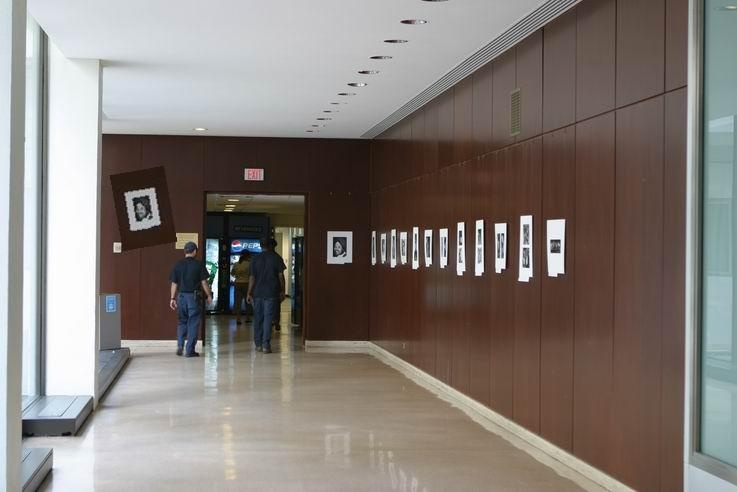

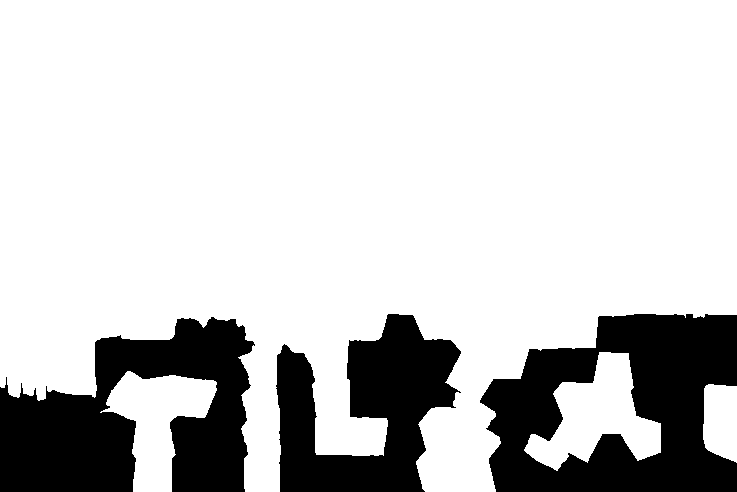

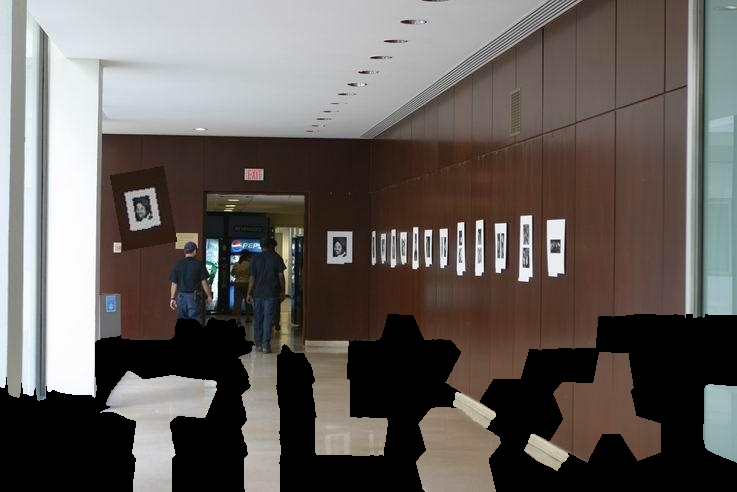

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
# Call the detect_tampering function on an input image
input_image_path = '/content/drive/MyDrive/dataset-2/Tamper/CRW_4901_JFRtamp176.jpg'
tampered_regions_mask = detect_tampering(input_image_path)

# Display the input image and the tampered regions mask
input_image = cv2.imread(input_image_path)
output_image = cv2.bitwise_and(input_image, input_image, mask=tampered_regions_mask)
cv2_imshow(input_image)
cv2_imshow(tampered_regions_mask)
cv2_imshow(output_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
